In [33]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
from glob import glob
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns

##Import any other packages you may need here
from itertools import chain
from random import sample
import scipy

EDA is open-ended, and it is up to you to decide how to look at different ways to slice and dice your data. A good starting point is to look at the requirements for the FDA documentation in the final part of this project to guide (some) of the analyses you do. 

This EDA should also help to inform you of how pneumonia looks in the wild. E.g. what other types of diseases it's commonly found with, how often it is found, what ages it affects, etc. 

Note that this NIH dataset was not specifically acquired for pneumonia. So, while this is a representation of 'pneumonia in the wild,' the prevalence of pneumonia may be different if you were to take only chest x-rays that were acquired in an ER setting with suspicion of pneumonia. 

Perform the following EDA:
* The patient demographic data such as gender, age, patient position,etc. (as it is available)
* The x-ray views taken (i.e. view position)
* The number of cases including: 
    * number of pneumonia cases,
    * number of non-pneumonia cases
* The distribution of other diseases that are comorbid with pneumonia
* Number of disease per patient 
* Pixel-level assessments of the imaging data for healthy & disease states of interest (e.g. histograms of intensity values) and compare distributions across diseases.

Note: use full NIH data to perform the first a few EDA items and use `sample_labels.csv` for the pixel-level assassements. 

Also, **describe your findings and how will you set up the model training based on the findings.**

In [50]:
all_xray_df.head()

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,...,Emphysema,Fibrosis,Hernia,Infiltration,Mass,No Finding,Nodule,Pleural_Thickening,Pneumonia,Pneumothorax
0,00000001_000.png,Cardiomegaly,0,1,58,M,PA,2682,2749,0.143,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
1,00000001_001.png,Cardiomegaly|Emphysema,1,1,58,M,PA,2894,2729,0.143,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,00000001_002.png,Cardiomegaly|Effusion,2,1,58,M,PA,2500,2048,0.168,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,00000002_000.png,No Finding,0,2,81,M,PA,2500,2048,0.171,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,00000003_000.png,Hernia,0,3,81,F,PA,2582,2991,0.143,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [43]:
all_xray_df['Finding Labels'].value_counts()

No Finding                                                           60361
Infiltration                                                          9547
Atelectasis                                                           4215
Effusion                                                              3955
Nodule                                                                2705
                                                                     ...  
Effusion|Emphysema|Infiltration|Mass|Nodule                              1
Atelectasis|Emphysema|Fibrosis|Pleural_Thickening                        1
Nodule|Pleural_Thickening|Pneumonia                                      1
Cardiomegaly|Effusion|Infiltration|Mass|Nodule|Pleural_Thickening        1
Emphysema|Fibrosis|Mass                                                  1
Name: Finding Labels, Length: 836, dtype: int64

0.0    5544
1.0      62
Name: Pneumonia, dtype: int64

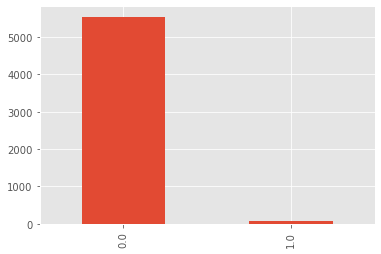

In [34]:
all_xray_df['Pneumonia'].value_counts().plot(kind = 'bar')
all_xray_df['Pneumonia'].value_counts()

PA    35
AP    27
Name: View Position, dtype: int64

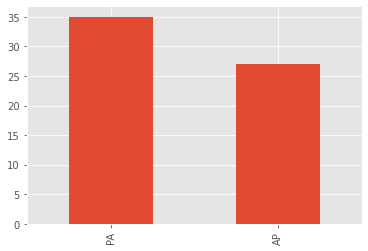

In [35]:
all_xray_df[all_xray_df.Pneumonia == 1]['View Position'].value_counts().plot(kind='bar')
all_xray_df[all_xray_df.Pneumonia == 1]['View Position'].value_counts()

In [26]:
## Below is some helper code to read data for you.
## Load NIH data
all_xray_df = pd.read_csv('/data/Data_Entry_2017.csv')
print(len(all_xray_df))
all_xray_df.sample(3)

112120


,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y],Unnamed: 11
29242,00007620_032.png,No Finding,32,7620,14,F,AP,2500,2048,0.168,0.168,NaN
70317,00017324_028.png,No Finding,28,17324,35,F,PA,2486,2725,0.143,0.143,NaN
25227,00006642_027.png,No Finding,27,6642,60,M,PA,2500,2048,0.168,0.168,NaN


In [27]:
## Load 'sample_labels.csv' data for pixel level assessments
sample_df = pd.read_csv('sample_labels.csv')
print(len(sample_df))
sample_df.sample(3)

5606


,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImageWidth,OriginalImageHeight,OriginalImagePixelSpacing_x,OriginalImagePixelSpacing_y
445,00002371_007.png,Atelectasis|Nodule,7,2371,037Y,M,AP,2048,2500,0.168,0.168
1199,00006329_014.png,Infiltration,14,6329,072Y,M,AP,2500,2048,0.171,0.171
5499,00029976_011.png,Mass,11,29976,051Y,M,PA,3056,2544,0.139,0.139


In [28]:
## EDA
# Todo
all_labels = np.unique(list(chain(*all_xray_df['Finding Labels'].map(lambda x: x.split('|')).tolist())))
all_labels = [x for x in all_labels if len(x) > 0]
for c_label in all_labels:
    if len(c_label) > 1:
        all_xray_df[c_label] = all_xray_df['Finding Labels'].map(lambda finding : 1.0 if c_label in finding else 0)
all_xray_df.head()

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,...,Emphysema,Fibrosis,Hernia,Infiltration,Mass,No Finding,Nodule,Pleural_Thickening,Pneumonia,Pneumothorax
0,00000001_000.png,Cardiomegaly,0,1,58,M,PA,2682,2749,0.143,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
1,00000001_001.png,Cardiomegaly|Emphysema,1,1,58,M,PA,2894,2729,0.143,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,00000001_002.png,Cardiomegaly|Effusion,2,1,58,M,PA,2500,2048,0.168,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,00000002_000.png,No Finding,0,2,81,M,PA,2500,2048,0.171,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,00000003_000.png,Hernia,0,3,81,F,PA,2582,2991,0.143,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### Diseases per Patient: 

In [74]:
all_xray_df[['Patient ID']+all_labels].dtypes
all_xray_df['Number of Diseases'] = all_xray_df[all_labels].sum(axis=1)

In [76]:
all_xray_df[['Patient ID', 'Number of Diseases']]

,Patient ID,Number of Diseases
0,1,4.0
1,1,2.0
2,1,1.0
3,2,1.0
4,3,3.0
...,...,...
112115,30801,0.0
112116,30802,0.0
112117,30803,0.0
112118,30804,0.0


In [49]:
all_xray_df.iloc[0]

Image Index                    00000001_000.png
Finding Labels                     Cardiomegaly
Follow-up #                                   0
Patient ID                                    1
Patient Age                                  58
Patient Gender                                M
View Position                                PA
OriginalImage[Width                        2682
Height]                                    2749
OriginalImagePixelSpacing[x               0.143
y]                                        0.143
Unnamed: 11                                 NaN
Atelectasis                                   0
Cardiomegaly                                  0
Consolidation                                 0
Edema                                         0
Effusion                                      0
Emphysema                                     1
Fibrosis                                      0
Hernia                                        0
Infiltration                            

Atelectasis           0.004531
Cardiomegaly          0.001258
Consolidation         0.002016
Edema                 0.001052
Effusion              0.005744
Emphysema             0.001133
Fibrosis              0.000749
Hernia                0.000116
Infiltration          0.008625
Mass                  0.002533
No Finding            0.027149
Nodule                0.002792
Pleural_Thickening    0.001570
Pneumonia             0.000553
Pneumothorax          0.002417
dtype: float64


[Text(0, 0.5, 'Number of Images of Different Findings')]

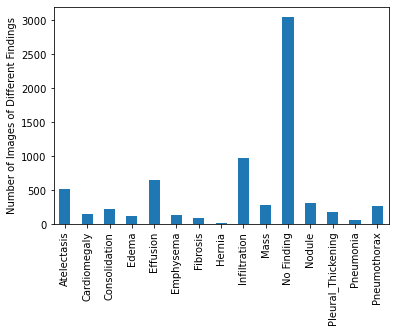

In [29]:
print(all_xray_df[all_labels].sum()/len(all_xray_df))
ax = all_xray_df[all_labels].sum().plot(kind='bar')
ax.set(ylabel='Number of Images of Different Findings')

No Finding                                  36
Infiltration                                 6
Effusion                                     2
Atelectasis|Effusion                         2
Pneumothorax                                 2
Atelectasis                                  2
Mass                                         1
Consolidation|Pneumothorax                   1
Fibrosis                                     1
Cardiomegaly|Infiltration                    1
Infiltration|Pneumonia                       1
Atelectasis|Effusion|Pneumothorax            1
Effusion|Mass|Pneumothorax                   1
Effusion|Pleural_Thickening                  1
Consolidation|Effusion|Infiltration|Mass     1
Pleural_Thickening|Pneumothorax              1
Emphysema                                    1
Edema|Effusion|Infiltration                  1
Name: Finding Labels, dtype: int64

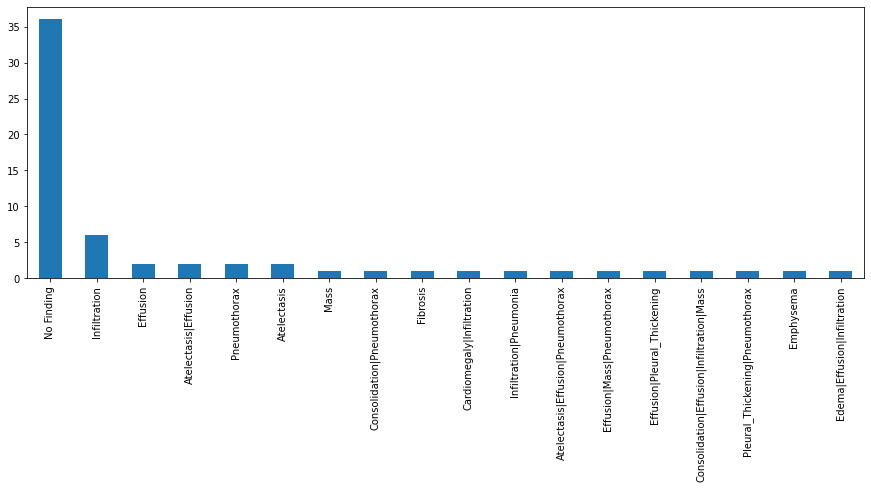

In [30]:
plt.figure(figsize=(15, 5))
all_xray_df[all_xray_df.Pneumonia == 1]['Finding Labels'].value_counts()[0:20].plot(kind='bar')
all_xray_df[all_xray_df.Pneumonia == 1]['Finding Labels'].value_counts()[0:20]

(array([8., 6., 4., 5., 8., 8., 8., 7., 4., 4.]),
 array([15. , 21.2, 27.4, 33.6, 39.8, 46. , 52.2, 58.4, 64.6, 70.8, 77. ]),
 <a list of 10 Patch objects>)

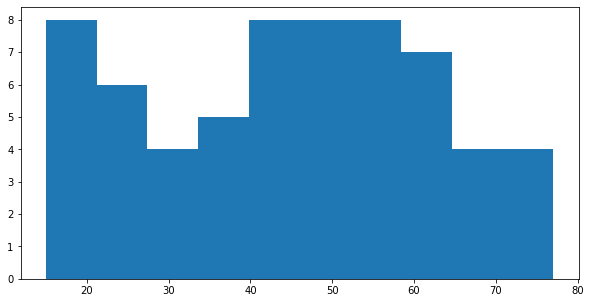

In [31]:
plt.figure(figsize=(10, 5))
plt.hist(all_xray_df[all_xray_df.Pneumonia == 1]['Patient Age'])

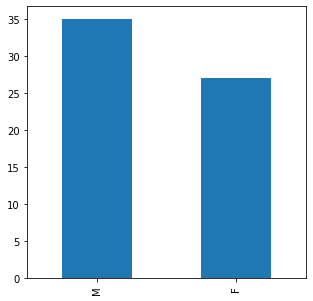

In [32]:
plt.figure(figsize=(5, 5))
all_xray_df[all_xray_df.Pneumonia == 1]['Patient Gender'].value_counts().plot(kind='bar')